## Dependencies & Setup

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.pyplot as inline
%matplotlib inline
import seaborn as sns

## Load Oil Prices Data
### Data Source: https://www.kaggle.com/usdot/pipeline-accidents

In [3]:
# Paths to Oil DOW Prices Data File
oil_dow_prices_file = "data/oil_dow_prices.csv"

# Read the data file using Pandas
oil_prices_original = pd.read_csv(oil_dow_prices_file)

## Cleanup & Inspect Oil Prices Data

In [4]:
# Drop unwanted columns from Oil Prices DataFrame
oil_prices_dropped = oil_prices_original.drop(['Unnamed: 0', 'Close Price'], axis=1)
# Rename columns
oil_prices_new = oil_prices_dropped.rename(columns = {'date':'Price Date', 'Crude_Oil_Price':'Crude Oil Price'})
# Add a new column for Price Year-Month
oil_prices_new['Price Year-Month'] = pd.to_datetime(oil_prices_new['Price Date']).dt.to_period('M')

# Filter for oil prices between 2010 and 2017 and create a clean new DataFrame
start_date = "2010-01-01"
end_date = "2017-12-01"
oil_prices_clean = oil_prices_new.loc[(oil_prices_new['Price Date'] >= start_date) & (oil_prices_new['Price Date'] <= end_date)]
oil_prices_clean.drop(['Price Date'], axis=1, inplace=True)
oil_prices_clean.reset_index(drop=True, inplace=True)
oil_prices_clean.info()
print(oil_prices_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
Crude Oil Price     96 non-null float64
Price Year-Month    96 non-null period[M]
dtypes: float64(1), period[M](1)
memory usage: 1.6 KB
    Crude Oil Price Price Year-Month
0             72.87          2010-01
1             72.74          2010-02
2             75.77          2010-03
3             78.80          2010-04
4             70.91          2010-05
..              ...              ...
91            44.96          2017-08
92            47.17          2017-09
93            49.12          2017-10
94            55.19          2017-11
95            56.98          2017-12

[96 rows x 2 columns]


## Load Oil Pipeline Accidents Data File

In [5]:
# Paths to Oil Pipeline Accidents Data File
oil_pipeline_accidents_file = "data/Oil_Pipeline_Accidents_2010-2017.csv"

# Read the data file using Pandas
oil_accidents_original = pd.read_csv(oil_pipeline_accidents_file)

## Cleanup Oil Pipeline Accidents Data

In [6]:
# Inspect the Oil Accidents DataFrame
oil_accidents_original.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [7]:
# Inspect columns from Oil Accidents DataFrame
oil_accidents_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

In [8]:
# Drop unwanted columns from Oil Accidents DataFrame
oil_accidents_dropped = oil_accidents_original.drop(['Report Number', 'Supplemental Number', 'Operator ID', 'Operator Contractor Injuries', 'Other Injuries', 'All Injuries', 'Emergency Responder Injuries', 'Operator Contractor Fatalities', 'Public Injuries','Emergency Responder Fatalities', 'Public Fatalities', 'Operator Employee Fatalities', 'Other Fatalities', 'All Fatalities', 'Operator Employee Injuries'], axis=1)

# 'Unintentional Release (Barrels)', 'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)', 'Liquid Ignition', 'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time', 'Restart Date/Time', 

# Fill missing/blank values in DataFrame using the apply function based on the data type of the column
oil_accidents_new = oil_accidents_dropped.apply(lambda x: x.fillna(0.0) if x.dtype.kind in 'f' else x.fillna('Not Available'))

oil_accidents_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 33 columns):
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2795 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2795 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          2795 non-null object
Liquid Name                             2795 non-null object
Accident City                           2795 non-null object
Accident County                         2795 non-null object
Accident State                          2795 non-null object
Accident Latitude                       2795 non-null float64
Accident Longitude                      2795 non-null float64
Cause Category                        

In [9]:
# Inspect the new Oil Accidents DataFrame
oil_accidents_new.head()

,Accident Year,Accident Date/Time,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,...,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,2010,1/1/2010 7:15 AM,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,Not Available,MCPHERSON,...,Not Available,Not Available,0.0,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,2010,1/4/2010 8:30 AM,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,Not Available,Not Available,RAYMOND,...,Not Available,Not Available,0.0,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,2010,1/5/2010 10:30 AM,"PETROLOGISTICS OLEFINS, LLC",Not Available,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,...,Not Available,Not Available,0.0,0.0,200.0,0.0,0.0,0.0,0.0,200
3,2010,1/6/2010 7:30 PM,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,Not Available,Not Available,SUPERIOR,...,Not Available,Not Available,0.0,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,2010,1/7/2010 1:00 PM,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,Not Available,Not Available,SHERMAN,...,Not Available,Not Available,0.0,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [10]:
# Change the All Costs column to float values and Accident Date/Time to Date
oil_accidents_clean = oil_accidents_new.astype({'All Costs': float})
oil_accidents_clean['Accident Date/Time'] = pd.to_datetime(oil_accidents_clean['Accident Date/Time']).dt.strftime('%Y-%m-%d')
oil_accidents_clean.rename(columns = {'Accident Date/Time': 'Accident Date'}, inplace=True)
oil_accidents_clean.head()

,Accident Year,Accident Date,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,...,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,2010,2010-01-01,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,Not Available,MCPHERSON,...,Not Available,Not Available,0.0,110.0,1517.0,0.0,0.0,0.0,0.0,1627.0
1,2010,2010-01-04,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,Not Available,Not Available,RAYMOND,...,Not Available,Not Available,0.0,4000.0,8.0,0.0,0.0,0.0,0.0,4008.0
2,2010,2010-01-05,"PETROLOGISTICS OLEFINS, LLC",Not Available,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,...,Not Available,Not Available,0.0,0.0,200.0,0.0,0.0,0.0,0.0,200.0
3,2010,2010-01-06,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,Not Available,Not Available,SUPERIOR,...,Not Available,Not Available,0.0,200.0,40.0,0.0,11300.0,0.0,0.0,11540.0
4,2010,2010-01-07,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,Not Available,Not Available,SHERMAN,...,Not Available,Not Available,0.0,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650.0


In [11]:
# Create a new DataFrame by adding a new column for Accident Month & Year
oil_accidents_clean['Accident Year-Month'] = pd.to_datetime(oil_accidents_clean['Accident Date']).dt.to_period('M')
accident_year_month = oil_accidents_clean['Accident Year-Month']
oil_accidents_clean.drop(labels=['Accident Year-Month'], axis=1, inplace=True)
oil_accidents_clean.insert(1, 'Accident Year-Month', accident_year_month)
oil_accidents_clean.head()

,Accident Year,Accident Year-Month,Accident Date,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,...,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,2010,2010-01,2010-01-01,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,Not Available,...,Not Available,Not Available,0.0,110.0,1517.0,0.0,0.0,0.0,0.0,1627.0
1,2010,2010-01,2010-01-04,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,Not Available,Not Available,...,Not Available,Not Available,0.0,4000.0,8.0,0.0,0.0,0.0,0.0,4008.0
2,2010,2010-01,2010-01-05,"PETROLOGISTICS OLEFINS, LLC",Not Available,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,...,Not Available,Not Available,0.0,0.0,200.0,0.0,0.0,0.0,0.0,200.0
3,2010,2010-01,2010-01-06,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,Not Available,Not Available,...,Not Available,Not Available,0.0,200.0,40.0,0.0,11300.0,0.0,0.0,11540.0
4,2010,2010-01,2010-01-07,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,Not Available,Not Available,...,Not Available,Not Available,0.0,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650.0


In [12]:
# Merge the Oil Prices and Oil Accidents DataFrames
oil_prices_accidents = pd.merge(oil_prices_clean, oil_accidents_clean, how='inner', left_on='Price Year-Month', right_on='Accident Year-Month')
#oil_prices_accidents_filtered = oil_prices_accidents.loc[(oil_prices_accidents['Price Date'] == '2010-06-01')]
oil_prices_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2795 entries, 0 to 2794
Data columns (total 36 columns):
Crude Oil Price                         2795 non-null float64
Price Year-Month                        2795 non-null period[M]
Accident Year                           2795 non-null int64
Accident Year-Month                     2795 non-null period[M]
Accident Date                           2795 non-null object
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2795 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2795 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          2795 non-null object
Liquid Name                             2795 non-null object
Accident City                           2795 non-null object
Accident County                         2795 non-null object
Accident State                   

In [13]:
# Inspect the merged DataFrame
# We will see rows where we have Oil Price Data but no record of Accident data for those dates
# Vice-versa we will also see rows where there is a recorded Accident, but Price Data is not available
oil_prices_accidents.head()

,Crude Oil Price,Price Year-Month,Accident Year,Accident Year-Month,Accident Date,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,72.87,2010-01,2010,2010-01,2010-01-01,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,Not Available,Not Available,0.0,110.0,1517.0,0.0,0.0,0.0,0.0,1627.0
1,72.87,2010-01,2010,2010-01,2010-01-04,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,Not Available,Not Available,0.0,4000.0,8.0,0.0,0.0,0.0,0.0,4008.0
2,72.87,2010-01,2010,2010-01,2010-01-05,"PETROLOGISTICS OLEFINS, LLC",Not Available,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,Not Available,Not Available,0.0,0.0,200.0,0.0,0.0,0.0,0.0,200.0
3,72.87,2010-01,2010,2010-01,2010-01-06,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,Not Available,Not Available,0.0,200.0,40.0,0.0,11300.0,0.0,0.0,11540.0
4,72.87,2010-01,2010,2010-01,2010-01-07,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,Not Available,Not Available,0.0,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650.0


In [14]:
# Group merged DataFrame on Accident Year-Month
oil_prices_accidents_grouped = oil_prices_accidents.groupby(['Accident Year-Month'])

# accidents_by_month = oil_prices_accidents_grouped['Accident Year-Month'].count()
# Value counts on Crude Oil Price column will give us the number of accidents for each year-month 
oil_prices_accidents_by_yearmonth = oil_prices_accidents_grouped['Crude Oil Price'].value_counts()

# Save data to a summary DF
oil_prices_accidents_summary = pd.DataFrame(oil_prices_accidents_by_yearmonth)

# Rename column, reset index of DF for plotting purposes and inspect
oil_prices_accidents_summary.rename(columns = {'Crude Oil Price':'Number of Accidents'}, inplace=True)
oil_prices_accidents_summary = oil_prices_accidents_summary.reset_index()
oil_prices_accidents_summary

,Accident Year-Month,Crude Oil Price,Number of Accidents
0,2010-01,72.87,34
1,2010-02,72.74,16
2,2010-03,75.77,32
3,2010-04,78.80,32
4,2010-05,70.91,30
...,...,...,...
80,2016-09,40.55,31
81,2016-10,45.00,33
82,2016-11,41.65,29
83,2016-12,47.12,33


## Plot Linear Regression

Text(30, -5, 'y =-0.04x + 36.22')

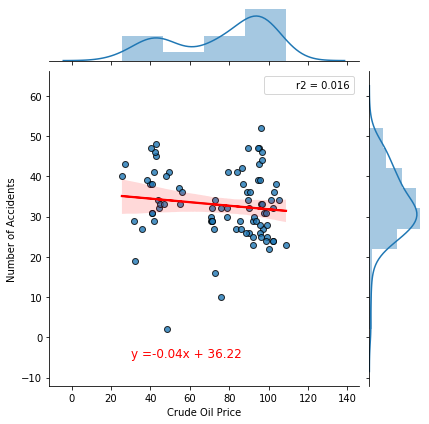

In [15]:
# Function to calculate r-square  
def r2(x, y):
    return st.pearsonr(x, y)[0] ** 2

# Draw Scatter Plot to show relationship between Number of Accidents & Oil Prices 
sns.jointplot(x="Crude Oil Price", y="Number of Accidents", data=oil_prices_accidents_summary, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

y_values = oil_prices_accidents_summary["Number of Accidents"]
x_values = oil_prices_accidents_summary["Crude Oil Price"]

# Calculate the linear regression model between Number of Accidents and Crude Oil Prices
# The stats.lingress function returns the slope, intercept, r-value, p-value and stderr 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Compute and store the regression values for the Number of Accidents
regress_values = x_values * slope + intercept

# Capture the linear regression line equation in the form: y = mx + c
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-5),fontsize=12,color="red")

Text(30, -5, 'y =-0.36x + 87.26')

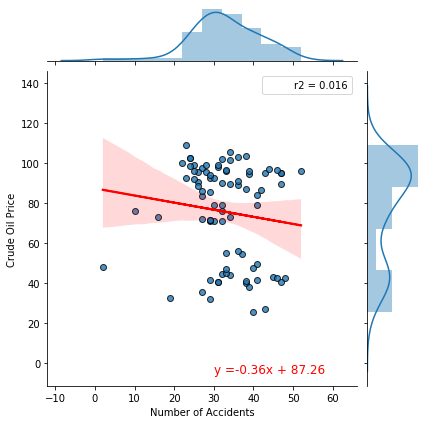

In [16]:
# Function to calculate r-square  
def r2(x, y):
    return st.pearsonr(x, y)[0] ** 2

# Draw Scatter Plot to show relationship between Number of Accidents & Oil Prices 
sns.jointplot(x="Number of Accidents", y="Crude Oil Price", data=oil_prices_accidents_summary, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

x_values = oil_prices_accidents_summary["Number of Accidents"]
y_values = oil_prices_accidents_summary["Crude Oil Price"]

# Calculate the linear regression model between Number of Accidents and Crude Oil Prices
# The stats.lingress function returns the slope, intercept, r-value, p-value and stderr 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Compute and store the regression values for the Number of Accidents
regress_values = x_values * slope + intercept

# Capture the linear regression line equation in the form: y = mx + c
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-5),fontsize=12,color="red")

## Plot Correlation Matrix

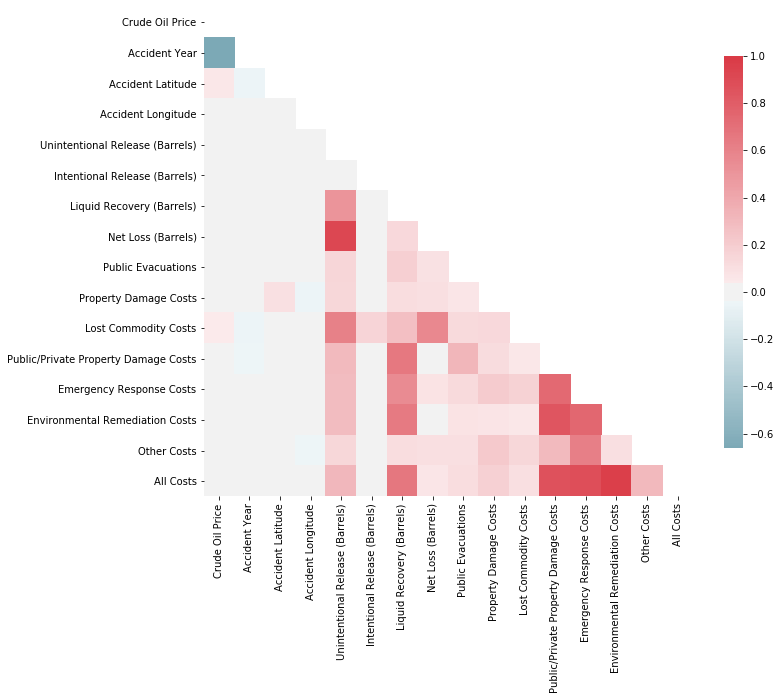

In [17]:
# Plot a diagonal correlation matrix

# Compute the correlation matrix
corr = oil_prices_accidents.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, cbar_kws={"shrink": .8})

## Linear Regression Model
### Can we predict the Number of Oil Pipeline Accidents based on Oil Price trends?

In [18]:
# Assign the data to respective x and y variables

oil_prices_x = oil_prices_accidents_summary[["Crude Oil Price"]]
oil_accidents_y = oil_prices_accidents_summary[["Number of Accidents"]]
print(oil_prices_x.shape, oil_accidents_y.shape)

(85, 1) (85, 1)


In [19]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Fit the model to existing data

model.fit(oil_prices_x, oil_accidents_y)
print(model)

# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Weight coefficients:  [[-0.04416317]]
y-axis intercept:  [36.22028339]


In [21]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split
oil_prices_x_train, oil_prices_x_test, oil_accidents_y_train, oil_accidents_y_test = train_test_split(oil_prices_x, oil_accidents_y, random_state=42)

In [22]:
# Fit the model to training data and calculate the scores for the training and testing data
# Note: This is the training step where you fit the line to the data.

model.fit(oil_prices_x_train, oil_accidents_y_train)
training_score = model.score(oil_prices_x_train, oil_accidents_y_train)
testing_score = model.score(oil_prices_x_test, oil_accidents_y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.00972712071167181
Testing Score: -0.002474606973733362


R2 Score: -0.002474606973733362



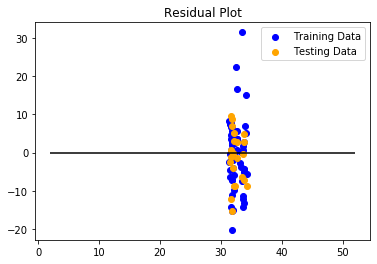

In [26]:
# Plot the Residuals for the Training and Testing data
from sklearn.metrics import r2_score

plt.scatter(model.predict(oil_prices_x_train), model.predict(oil_prices_x_train) - oil_accidents_y_train, c="blue", label="Training Data")
plt.scatter(model.predict(oil_prices_x_test), model.predict(oil_prices_x_test) - oil_accidents_y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=oil_accidents_y.min(), xmax=oil_accidents_y.max())
plt.title("Residual Plot")

print(f"R2 Score: {r2_score(oil_accidents_y_test,model.predict(oil_prices_x_test))}\n")